In [ ]:
!pip install matplotlib


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
# View column names
print(df.columns)

# Check for null values
print(df.isnull().sum())

# Fill missing country and rating
df['country'].fillna("Unknown", inplace=True)
df['rating'].fillna("Not Rated", inplace=True)

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

# Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        10
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64


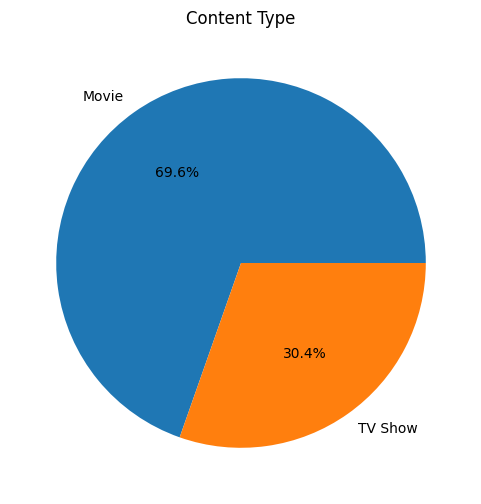

In [11]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Content Type')
plt.ylabel('')
plt.show()

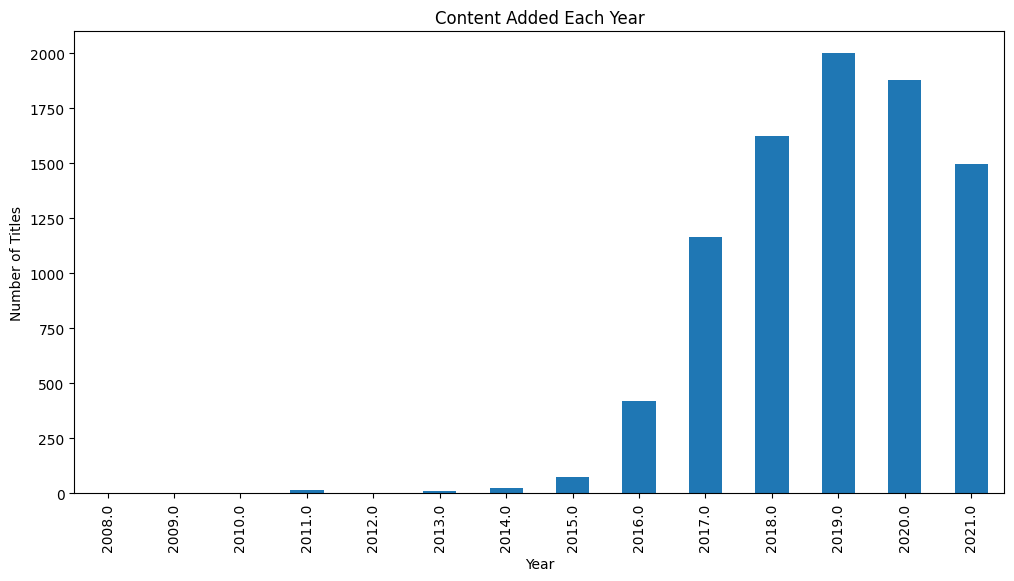

In [12]:
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,6), title="Content Added Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

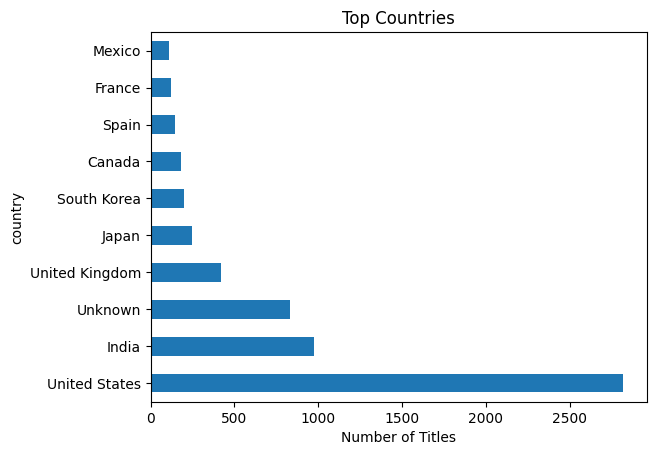

In [13]:
df['country'].value_counts().head(10).plot(kind='barh', title="Top Countries")
plt.xlabel("Number of Titles")
plt.show()

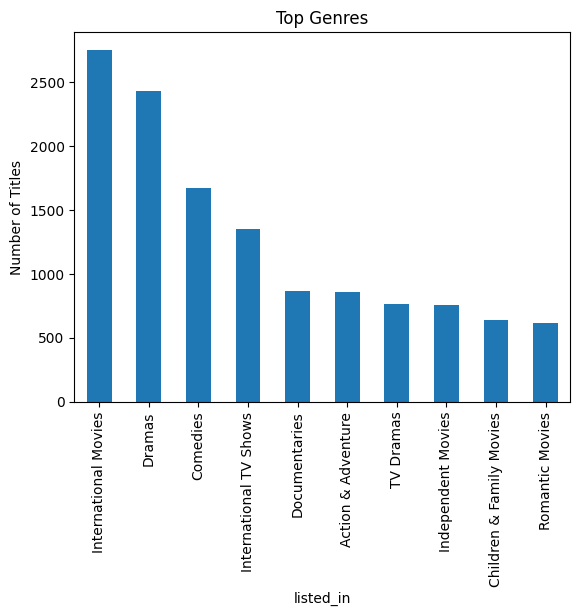

In [14]:
genres = df['listed_in'].str.split(',').explode().str.strip()
genres.value_counts().head(10).plot(kind='bar', title="Top Genres")
plt.ylabel("Number of Titles")
plt.show()

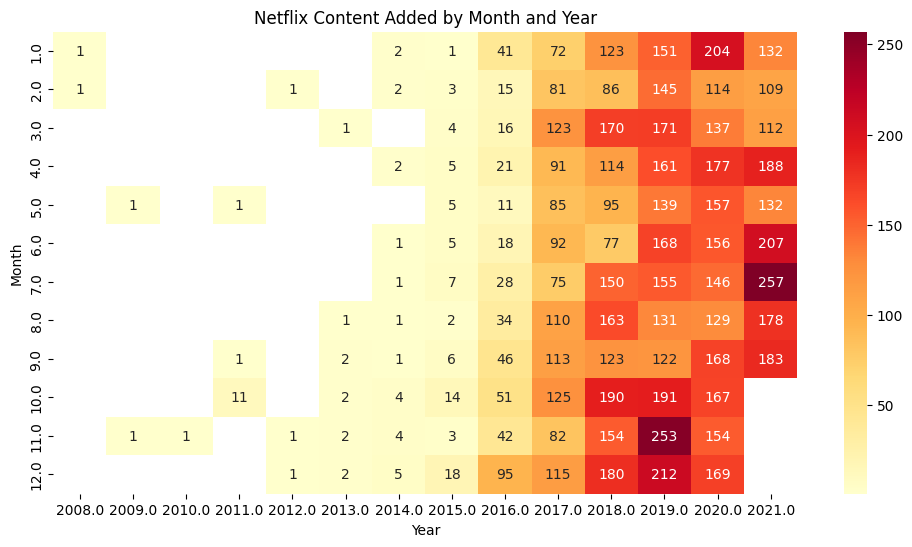

In [15]:
heatmap_data = df.pivot_table(index='month_added', columns='year_added', values='show_id', aggfunc='count')

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt='.0f')
plt.title("Netflix Content Added by Month and Year")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

### 🔍 Insights:
- Netflix has more *Movies (~70%)* than TV Shows.
- Maximum content was added in *2019–2020*.
- *USA, India, UK* are top content producers.
- Most popular genres: *Dramas, Comedies, Documentaries*.